In [1]:
from deepface import DeepFace
import pandas as pd
import os
import unicodedata
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output

In [2]:


# Path to your dataset
dataset_path = "images/svc_classification_corrected"

# Function to rename files and folders to ASCII-only names
def rename_files_and_folders(directory):
    for root, dirs, files in os.walk(directory, topdown=False):
        # Rename files first
        for filename in files:
            new_filename = unicodedata.normalize('NFKD', filename).encode('ascii', 'ignore').decode('ascii')
            old_filepath = os.path.join(root, filename)
            new_filepath = os.path.join(root, new_filename)
            if old_filepath != new_filepath:
                os.rename(old_filepath, new_filepath)
                print(f"Renamed file: {old_filepath} → {new_filepath}")

        # Rename directories
        for dirname in dirs:
            new_dirname = unicodedata.normalize('NFKD', dirname).encode('ascii', 'ignore').decode('ascii')
            old_dirpath = os.path.join(root, dirname)
            new_dirpath = os.path.join(root, new_dirname)
            if old_dirpath != new_dirpath:
                os.rename(old_dirpath, new_dirpath)
                print(f"Renamed folder: {old_dirpath} → {new_dirpath}")

# Run renaming function
rename_files_and_folders(dataset_path)
print("✔ All filenames and folder names have been converted to ASCII.")




✔ All filenames and folder names have been converted to ASCII.


In [3]:
import os
import pandas as pd
from deepface import DeepFace
from datetime import datetime

# Original news dataset path
dataset_path = "images/svc_classification_corrected"

# New Instagram image path
instagram_path = "images/Instagram_posts"


# Initialize results list
results = []

# --- PART 1: Analyze News Article Images ---
for main_folder in os.listdir(dataset_path):
    main_folder_path = os.path.join(dataset_path, main_folder)

    if os.path.isdir(main_folder_path):
        for person_folder in os.listdir(main_folder_path):
            person_folder_path = os.path.join(main_folder_path, person_folder)

            if os.path.isdir(person_folder_path):
                for image_name in os.listdir(person_folder_path):
                    image_path = os.path.join(person_folder_path, image_name)

                    if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                        try:
                            analysis = DeepFace.analyze(
                                img_path=image_path,
                                actions=['emotion'],
                                detector_backend="mtcnn",
                                enforce_detection=False
                            )

                            emotion_data = analysis[0]['emotion']
                            region_data = analysis[0]['region']

                            results.append({
                                "Image": image_name,
                                "Folder": main_folder,
                                "Person": person_folder,
                                "Dominant Emotion": analysis[0]['dominant_emotion'],
                                "Angry": emotion_data['angry'],
                                "Disgust": emotion_data['disgust'],
                                "Fear": emotion_data['fear'],
                                "Happy": emotion_data['happy'],
                                "Sad": emotion_data['sad'],
                                "Surprise": emotion_data['surprise'],
                                "Neutral": emotion_data['neutral'],
                                "Face X": region_data['x'],
                                "Face Y": region_data['y'],
                                "Face Width": region_data['w'],
                                "Face Height": region_data['h'],
                                "Left Eye X": region_data['left_eye'][0],
                                "Left Eye Y": region_data['left_eye'][1],
                                "Right Eye X": region_data['right_eye'][0],
                                "Right Eye Y": region_data['right_eye'][1],
                                "Face Confidence": analysis[0]['face_confidence'],
                                "Date": None  # Not applicable for news images
                            })

                        except Exception as e:
                            print(f"Error processing {image_path}: {str(e)}")

# --- PART 2: Analyze Instagram Images with Date ---
for person_folder in os.listdir(instagram_path):
    person_folder_path = os.path.join(instagram_path, person_folder)

    if os.path.isdir(person_folder_path):
        for image_name in os.listdir(person_folder_path):
            image_path = os.path.join(person_folder_path, image_name)

            if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    # Extract date from filename (e.g., "250923_384.jpg" → 25-09-23)
                    date_str = image_name.split('_')[0]
                    try:
                        parsed_date = datetime.strptime(date_str, "%d%m%y").date()
                    except ValueError:
                        parsed_date = None

                    analysis = DeepFace.analyze(
                        img_path=image_path,
                        actions=['emotion'],
                        detector_backend="mtcnn",
                        enforce_detection=False
                    )

                    emotion_data = analysis[0]['emotion']
                    region_data = analysis[0]['region']

                    results.append({
                        "Image": image_name,
                        "Folder": "Instagram",
                        "Person": person_folder,
                        "Dominant Emotion": analysis[0]['dominant_emotion'],
                        "Angry": emotion_data['angry'],
                        "Disgust": emotion_data['disgust'],
                        "Fear": emotion_data['fear'],
                        "Happy": emotion_data['happy'],
                        "Sad": emotion_data['sad'],
                        "Surprise": emotion_data['surprise'],
                        "Neutral": emotion_data['neutral'],
                        "Face X": region_data['x'],
                        "Face Y": region_data['y'],
                        "Face Width": region_data['w'],
                        "Face Height": region_data['h'],
                        "Left Eye X": region_data['left_eye'][0],
                        "Left Eye Y": region_data['left_eye'][1],
                        "Right Eye X": region_data['right_eye'][0],
                        "Right Eye Y": region_data['right_eye'][1],
                        "Face Confidence": analysis[0]['face_confidence'],
                        "Date": parsed_date
                    })

                except Exception as e:
                    print(f"Error processing {image_path}: {str(e)}")

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Save results to CSV
df.to_csv("deepface_emotions_combined.csv", index=False)

print("Analysis complete! Results saved to deepface_emotions_combined.csv")


Error processing images/svc_classification_corrected\NOS_t1\Dilan Yesilgoz\2499654_094.jpg: 'NoneType' object is not subscriptable
Error processing images/svc_classification_corrected\NOS_t1\Frans Timmermans\2498103_637.jpg: 'NoneType' object is not subscriptable
Error processing images/svc_classification_corrected\NOS_t1\Joost Eerdmans\2488941_4205.jpg: 'NoneType' object is not subscriptable
Error processing images/svc_classification_corrected\NOS_t1\Joost Eerdmans\2495543_1580.jpg: 'NoneType' object is not subscriptable
Error processing images/svc_classification_corrected\NOS_t1\Pieter Omtzigt\2501511_660.jpg: 'NoneType' object is not subscriptable
Error processing images/svc_classification_corrected\NU_t1\Frans Timmermans\6285325_1090.jpg: 'NoneType' object is not subscriptable
Error processing images/svc_classification_corrected\NU_t1\Pieter Omtzigt\6287604_363.jpg: 'NoneType' object is not subscriptable
Error processing images/svc_classification_corrected\NU_t1\Pieter Omtzigt\6290

In [4]:
photo_counts = df['Person'].value_counts().reset_index()
photo_counts.columns = ['Person', 'Photo Count']

# Display the table
print(photo_counts)

                   Person  Photo Count
0          Thierry Baudet          224
1          Dilan Yesilgoz          136
2   Caroline van der Plas          110
3          Joost Eerdmans          106
4      Lilian Marijnissen           98
5          Henri Bontebal           93
6              Rob Jetten           88
7          Pieter Omtzigt           80
8         Esther Ouwehand           76
9           Geert Wilders           74
10     Stephan van Baarle           59
11          Mirjam Bikker           47
12       Frans Timmermans           39
13         Laurens Dassen           38
14        Wybren van Haga           23
15              Edson Olf           17
16    Kees van der Staaij            8


In [5]:
photo_counts_insta = df[df['Folder'] == 'Instagram']['Person'].value_counts().reset_index()
photo_counts_insta.columns = ['Person', 'Instagram Photo Count']    

print(photo_counts_insta)

                   Person  Instagram Photo Count
0          Thierry Baudet                    204
1          Joost Eerdmans                    104
2      Lilian Marijnissen                     84
3   Caroline van der Plas                     83
4          Dilan Yesilgoz                     81
5          Henri Bontebal                     80
6              Rob Jetten                     61
7      Stephan van Baarle                     53
8           Mirjam Bikker                     44
9         Esther Ouwehand                     42
10         Laurens Dassen                     34
11       Frans Timmermans                     22
12        Wybren van Haga                     19
13         Pieter Omtzigt                     19
14              Edson Olf                     16
15          Geert Wilders                     12
16    Kees van der Staaij                      6


In [6]:
political_df = pd.read_csv("Political_Orientation_Data.csv")


df["Person"] = df["Person"].replace("Dilan Yesilgoz", "Dilan Yesilgöz")
dataframe_political = df.merge(political_df, on="Person", how="left")

In [7]:
# import os
# import shutil
# import random

# # Path definitions
# base_dir = "images"
# instagram_dir = os.path.join(base_dir, "Instagram_posts")
# news_dir = os.path.join(base_dir, "svc_classification_corrected")
# test_set_dir = os.path.join(base_dir, "test_set")

# # Number of images per politician for test set
# images_per_politician = 15  # Adjust this as desired

# # Politician names (exact as folders)
# politicians = [
#     "Thierry Baudet", "Joost Eerdmans", "Lilian Marijnissen", "Caroline van der Plas",
#     "Dilan Yesilgoz", "Henri Bontebal", "Rob Jetten", "Stephan van Baarle",
#     "Mirjam Bikker", "Esther Ouwehand", "Laurens Dassen", "Frans Timmermans",
#     "Wybren van Haga", "Pieter Omtzigt", "Edson Olf", "Geert Wilders", "Kees van der Staaij"
# ]

# # Ensure test set directories exist
# for source in ['Instagram_posts', 'svc_classification_corrected']:
#     for pol in politicians:
#         os.makedirs(os.path.join(test_set_dir, source, pol), exist_ok=True)

# # Function to copy images
# for pol in politicians:
#     # Get available images
#     insta_path = os.path.join(instagram_dir, pol)
#     news_path = os.path.join(news_dir, pol)
    
#     insta_images = os.listdir(insta_path) if os.path.exists(insta_path) else []
#     news_images = os.listdir(news_path) if os.path.exists(news_path) else []

#     random.shuffle(insta_images)
#     random.shuffle(news_images)

#     # Calculate split roughly equal
#     insta_count = min(len(insta_images), images_per_politician // 2)
#     news_count = min(len(news_images), images_per_politician - insta_count)

#     # Adjust if total images are not sufficient
#     if insta_count + news_count < images_per_politician:
#         if len(insta_images) > insta_count:
#             insta_count = min(len(insta_images), images_per_politician - news_count)
#         elif len(news_images) > news_count:
#             news_count = min(len(news_images), images_per_politician - insta_count)

#     # Copy images
#     for img in insta_images[:insta_count]:
#         shutil.copy(os.path.join(insta_path, img), os.path.join(test_set_dir, 'Instagram_posts', pol, img))

#     for img in news_images[:news_count]:
#         shutil.copy(os.path.join(news_path, img), os.path.join(test_set_dir, 'svc_classification_corrected', pol, img))

# print("Test set created successfully!")

In [8]:
# import os
# import shutil
# import random

# # Configuration
# base_dir = "images"
# source_dir = os.path.join(base_dir, "svc_classification_corrected")  # news source
# output_dir = os.path.join(base_dir, "test_set", "svc_classification_corrected")

# # Politicians to include
# politicians = [
#     "Thierry Baudet", "Dilan Yesilgoz", "Caroline van der Plas", "Joost Eerdmans",
#     "Lilian Marijnissen", "Henri Bontebal", "Rob Jetten", "Pieter Omtzigt",
#     "Esther Ouwehand", "Geert Wilders", "Stephan van Baarle", "Mirjam Bikker",
#     "Frans Timmermans", "Laurens Dassen", "Wybren van Haga", "Edson Olf",
#     "Kees van der Staaij"
# ]

# # Number of test images per politician
# images_per_politician = 10  # Adjust as needed

# # Create test set directories only for news data
# for pol in politicians:
#     os.makedirs(os.path.join(output_dir, pol), exist_ok=True)

# # Copy selected test images from NOS_t1 and NU_t1 subdirectories
# for pol in politicians:
#     pol_dst = os.path.join(output_dir, pol)
#     collected_images = []

#     for subfolder in ["NOS_t1", "NU_t1"]:
#         pol_src = os.path.join(source_dir, subfolder, pol)
#         if not os.path.exists(pol_src):
#             continue

#         images = [os.path.join(pol_src, f) for f in os.listdir(pol_src)
#                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#         collected_images.extend(images)

#     if not collected_images:
#         print(f"Warning: no images found for {pol} in subfolders.")
#         continue

#     random.shuffle(collected_images)
#     selected = collected_images[:min(images_per_politician, len(collected_images))]

#     for img_path in selected:
#         shutil.copy(img_path, os.path.join(pol_dst, os.path.basename(img_path)))

# print("News test set added to test_set/svc_classification_corrected!")

In [2]:
labels_by_folder = {
    "Instagram_posts": {
        "Thierry Baudet": ['Angry', 'Surprise', 'Angry', 'Neutral', 'Neutral',
                            'Sad', 'Neutral', 'Angry', 'Fear', 'Happy',
                            'Neutral', 'Disgust', 'Sad', 'Neutral', 'Neutral',],
        "Dilan Yesilgoz": ['Neutral', 'Happy', 'Happy', 'Sad', 'Neutral',
                            'Happy', 'Happy', 'Happy', 'Happy', 'Happy',
                            'Neutral', 'Neutral', 'Neutral', 'Happy', 'Neutral'],
        "Caroline van der Plas": ['Happy', 'Neutral', 'Happy', 'Happy', 'Happy',
                                   'Neutral','Happy', 'Happy', 'Happy', 'Neutral',
                                    'Happy', 'Happy', 'Happy', 'Sad', 'Happy'],
        "Joost Eerdmans": ['Angry', 'Surprise', 'Angry', 'Angry', 'Neutral',
                            'Happy', 'Neutral', 'Angry', 'Angry', 'Happy',
                              'Sad', 'Fear', 'Angry', 'Neutral', 'Angry',],
        "Lilian Marijnissen": ['Happy', 'Neutral', 'Happy', 'Happy', 'Happy',
                                'Happy', 'Neutral', 'Neutral', 'Neutral', 'Angry',
                                'Happy', 'Happy', 'Neutral', 'Neutral', 'Angry'],
        "Henri Bontebal": ['Sad', 'Fear', 'Angry', 'Happy', 'Happy',
                            'Happy', 'Neutral', 'Neutral', 'Neutral', 'Happy',
                            'Happy', 'Happy', 'Happy', 'Neutral', 'Happy'],
        "Rob Jetten": ['Angry', 'Neutral', 'Angry', 'Happy', 'Happy',
                        'Happy', 'Happy', 'Happy', 'Happy', 'Neutral',
                        'Neutral', 'Happy', 'Neutral', 'Happy', 'Neutral'],
        "Pieter Omtzigt": ['Happy', 'Neutral', 'Neutral', 'Happy', 'Neutral',
                            'Happy', 'Neutral', 'Neutral', 'Angry', 'Happy',
                            'Neutral', 'Happy', 'Happy', 'Sad', 'Happy'],
        "Esther Ouwehand": ['Happy', 'Happy', 'Happy', 'Happy', 'Surprise',
                             'Neutral', 'Happy', 'Happy', 'Fear', 'Fear',
                               'Neutral', 'Neutral', 'Happy', 'Happy', 'Happy'],
        "Geert Wilders": ['Neutral', 'Neutral', 'Happy', 'Happy', 'Happy',
                           'Happy', 'Happy', 'Neutral', 'Happy', 'Neutral',
                             'Neutral', 'Happy'],
        "Stephan van Baarle": ['Happy', 'Angry', 'Happy', 'Neutral', 'Neutral',
                                'Neutral', 'Neutral', 'Neutral', 'Angry', 'Sad',
                                'Sad', 'Neutral', 'Angry', 'Neutral', 'Neutral'],
        "Mirjam Bikker": ['Neutral', 'Happy', 'Happy', 'Angry', 'Happy',
                           'Happy', 'Neutral', 'Angry', 'Happy', 'Neutral',
                            'Angry', 'Sad', 'Happy', 'Happy', 'Fear'],
        "Frans Timmermans": ['Fear', 'Sad', 'Neutral', 'Happy', 'Sad',
                              'Angry', 'Neutral', 'Sad', 'Fear', 'Neutral',
                               'Neutral', 'Angry', 'Happy', 'Happy', 'Sad'],
        "Laurens Dassen": ['Angry', 'Surprise', 'Happy', 'Neutral', 'Happy',
                            'Fear', 'Neutral', 'Angry', 'Surprise', 'Neutral',
                            'Neutral', 'Sad', 'Angry', 'Happy', 'Happy'],
        "Wybren van Haga": ['Happy', 'Neutral', 'Happy', 'Happy', 'Sad',
                             'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Angry',
                              'Neutral', 'Angry', 'Neutral', 'Happy', 'Happy'],
        "Edson Olf": ['Neutral', 'Angry', 'Neutral', 'Angry', 'Sad',
                       'Happy', 'Neutral', 'Neutral', 'Happy', 'Neutral',
                         'Neutral', 'Neutral', 'Angry', 'Happy', 'Neutral'],
        "Kees van der Staaij": ['Neutral', 'Neutral', 'Surprise', 'Happy', 'Happy', 'Happy'],
    },
    "svc_classification_corrected": {
        "Thierry Baudet": ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Angry',
                           'Surprise', 'Happy', 'Surprise', 'Neutral', 'Neutral'],
        "Dilan Yesilgoz": ['Angry', 'Happy', 'Happy', 'Happy', 'Neutral',
                            'Neutral', 'Neutral', 'Neutral', 'Happy', 'Neutral'],
        "Caroline van der Plas": ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Happy',
                                  'Happy', 'Neutral', 'Happy', 'Neutral', 'Neutral'],
        "Joost Eerdmans": ['Happy', 'Angry', 'Neutral', 'Angry'],
        "Lilian Marijnissen": ['Happy', 'Sad', 'Neutral', 'Neutral', 'Happy',
                               'Happy', 'Neutral', 'Happy', 'Neutral', 'Neutral'],
        "Henri Bontebal": ['Neutral', 'Sad', 'Happy', 'Angry', 'Happy',
                           'Sad', 'Sad', 'Happy', 'Happy', 'Neutral'],
        "Rob Jetten": ['Sad', 'Neutral', 'Happy', 'Happy', 'Happy',
                       'Happy', 'Happy', 'Neutral', 'Neutral', 'Neutral'],
        "Pieter Omtzigt": ['Fear', 'Happy', 'Sad', 'Happy', 'Angry',
                           'Happy', 'Angry', 'Neutral', 'Neutral', 'Neutral']
,
        "Esther Ouwehand": ['Neutral', 'Neutral', 'Sad', 'Happy', 'Happy',
                            'Neutral', 'Neutral', 'Happy', 'Happy', 'Neutral']
,
        "Geert Wilders": ['Neutral', 'Happy', 'Angry', 'Happy', 'Happy',
                          'Neutral', 'Happy', 'Happy', 'Happy', 'Neutral']
,
        "Stephan van Baarle": ['Angry', 'Sad', 'Happy', 'Happy', 'Neutral',
                               'Sad', 'Neutral']
,
        "Mirjam Bikker": ['Happy', 'Neutral', 'Happy'],
        "Frans Timmermans": ['Neutral', 'Happy', 'Sad', 'Neutral', 'Sad',
                             'Sad', 'Angry', 'Sad', 'Angry', 'Happy']
,
        "Laurens Dassen": ['Neutral', 'Neutral', 'Neutral', 'Surprise'],
        "Wybren van Haga": ['Happy', 'Happy', 'Happy', 'Happy'],
        "Edson Olf": ['Happy'],
        "Kees van der Staaij": ['Neutral', 'Happy'],
    }
}


In [4]:
import os
import pandas as pd

# Define the test set directory
test_set_dir = "images/test_set"

# Assume labels_by_folder is already defined elsewhere in the script
# This code will match the order of labels to files in the test set folders

image_ids = []
labels = []
sources = []
politicians_list = []

for source_type, politicians in labels_by_folder.items():
    for person, emotion_list in politicians.items():
        person_dir = os.path.join(test_set_dir, source_type, person)
        if not os.path.exists(person_dir):
            continue

        # Get all image filenames in that directory and sort
        image_files = sorted([f for f in os.listdir(person_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

        # Match the sorted filenames to the emotions by order
        for filename, emotion in zip(image_files, emotion_list):
            image_ids.append(filename)
            labels.append(emotion)
            sources.append(source_type)
            politicians_list.append(person)

# Create the DataFrame
test_set_df = pd.DataFrame({
    'Image ID': image_ids,
    'Actual Emotion': labels,
    'Source': sources,
    'Politician': politicians_list
})

# Save to CSV
test_set_df.to_csv("test_set_labels.csv", index=False)




In [11]:
import pandas as pd

# Load test set labels and deepface predictions
test_set_df = pd.read_csv("test_set_labels.csv")
deepface_df = pd.read_csv("deepface_emotions_combined.csv")

# Merge: add prediction to test set based on image filename
merged_test_set = test_set_df.merge(
    deepface_df[['Image', 'Dominant Emotion']],
    left_on='Image ID',
    right_on='Image',
    how='left'
)

# Rename column to match the format you want
merged_test_set.rename(columns={'Dominant Emotion': 'Predicted Emotion'}, inplace=True)

# Drop extra column if needed
merged_test_set.drop(columns=['Image'], inplace=True)

# Preview result
print(merged_test_set.head())


         Image ID Actual Emotion           Source      Politician  \
0  011123_th2.png          Angry  Instagram_posts  Thierry Baudet   
1  021123_th3.png       Surprise  Instagram_posts  Thierry Baudet   
2  051123_th3.png          Angry  Instagram_posts  Thierry Baudet   
3  091123_th2.png        Neutral  Instagram_posts  Thierry Baudet   
4   131223_th.png        Neutral  Instagram_posts  Thierry Baudet   

  Predicted Emotion  
0           neutral  
1           neutral  
2           neutral  
3           neutral  
4           neutral  


In [12]:
# Clean up accidental concatenations and whitespace
merged_test_set['Actual Emotion'] = merged_test_set['Actual Emotion'].astype(str).str.strip().str.lower()
merged_test_set['Predicted Emotion'] = merged_test_set['Predicted Emotion'].astype(str).str.strip().str.lower()

# Optional: filter out invalid labels (e.g. "neutralneutral")
valid_emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
merged_test_set = merged_test_set[
    merged_test_set['Actual Emotion'].isin(valid_emotions) &
    merged_test_set['Predicted Emotion'].isin(valid_emotions)
]


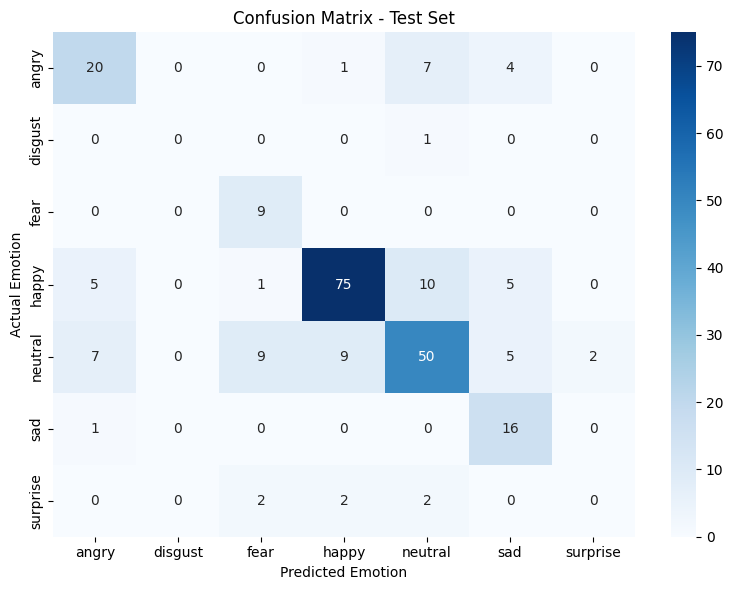

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Normalize emotion labels to lowercase for comparison
merged_test_set['Actual Emotion'] = merged_test_set['Actual Emotion'].astype(str).str.lower()
merged_test_set['Predicted Emotion'] = merged_test_set['Predicted Emotion'].astype(str).str.lower()

# Drop rows with missing predictions
merged_test_set = merged_test_set.dropna(subset=['Predicted Emotion'])

# Get unique emotion classes
emotions = sorted(set(
    label for label in merged_test_set['Actual Emotion']
    if isinstance(label, str) and label.strip() != ""
))

# Build confusion matrix
cm = confusion_matrix(
    merged_test_set['Actual Emotion'],
    merged_test_set['Predicted Emotion'],
    labels=emotions
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cm, index=emotions, columns=emotions),
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.tight_layout()
plt.show()


In [14]:
# Calculate accuracy per politician
accuracy_by_politician = (
    merged_test_set.assign(Match=merged_test_set['Actual Emotion'] == merged_test_set['Predicted Emotion'])
    .groupby('Politician')['Match']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'Correct', 'count': 'Total'})
)

accuracy_by_politician['Accuracy (%)'] = (accuracy_by_politician['Correct'] / accuracy_by_politician['Total'] * 100).round(1)

print("Accuracy per Politician:")
print(accuracy_by_politician)


Accuracy per Politician:
                       Correct  Total  Accuracy (%)
Politician                                         
Caroline van der Plas       12     15          80.0
Dilan Yesilgoz              12     15          80.0
Edson Olf                    5     15          33.3
Esther Ouwehand             12     16          75.0
Frans Timmermans             8     15          53.3
Geert Wilders                8     12          66.7
Henri Bontebal              12     15          80.0
Joost Eerdmans               8     15          53.3
Kees van der Staaij          4      6          66.7
Laurens Dassen              11     15          73.3
Lilian Marijnissen          11     15          73.3
Mirjam Bikker               12     15          80.0
Pieter Omtzigt              12     15          80.0
Rob Jetten                  12     15          80.0
Stephan van Baarle           8     15          53.3
Thierry Baudet              11     15          73.3
Wybren van Haga             12     14  

In [15]:
import pandas as pd

# Copy and normalize
df = merged_test_set.copy()
df['Actual Emotion'] = df['Actual Emotion'].str.strip().str.lower()
df['Predicted Emotion'] = df['Predicted Emotion'].str.strip().str.lower()

# Exclude any rows where actual OR predicted is 'neutral'
filtered_df = df[
    (df['Actual Emotion'] != 'neutral') &
    (df['Predicted Emotion'] != 'neutral')
]

# Add match column
filtered_df['Match'] = filtered_df['Actual Emotion'] == filtered_df['Predicted Emotion']

# Group by politician and compute accuracy
accuracy = (
    filtered_df.groupby('Politician')['Match']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'Correct', 'count': 'Total'})
)
accuracy['Accuracy (no neutral involved)'] = (accuracy['Correct'] / accuracy['Total'] * 100).round(1)

print(accuracy)


                       Correct  Total  Accuracy (no neutral involved)
Politician                                                           
Caroline van der Plas       10     12                            83.3
Dilan Yesilgoz               6      6                           100.0
Edson Olf                    2      6                            33.3
Esther Ouwehand             10     11                            90.9
Frans Timmermans             8      9                            88.9
Geert Wilders                6      7                            85.7
Henri Bontebal              10     10                           100.0
Joost Eerdmans               7      9                            77.8
Kees van der Staaij          3      4                            75.0
Laurens Dassen               7     11                            63.6
Lilian Marijnissen           7      9                            77.8
Mirjam Bikker               10     11                            90.9
Pieter Omtzigt      

In [17]:
import pandas as pd

# Load your main DataFrame
df = pd.read_csv("deepface_emotions_combined.csv")

# Load the Excel file with extra info
full_df = pd.read_excel("full_df_preprocessed.xlsx")

# Select only the columns you want to merge (use 'paragraph' not 'paragraphs')
columns_to_merge = ['id', 'date', 'category', 'title', 'paragraphs', 'url']
full_df = full_df[columns_to_merge]

# Extract the part before '_' in the Image column for matching
df['image_id'] = df['Image'].astype(str).str.split('_').str[0]
full_df['id'] = full_df['id'].astype(str)

# Merge on the extracted image_id and id
df_merged = df.merge(full_df, left_on='image_id', right_on='id', how='left')

# If 'Date' is missing (i.e., for news images), fill it with the merged 'date' column
df_merged['Date'] = df_merged['Date'].combine_first(df_merged['date'])

# Drop the now-redundant columns
df_merged = df_merged.drop(columns=['id', 'image_id', 'date'])

# Save the merged DataFrame, replacing the original CSV
df_merged.to_csv("deepface_emotions_combined.csv", index=False)


print("Merged DataFrame saved to deepface_emotions_combined.csv")

Merged DataFrame saved to deepface_emotions_combined.csv
